In [42]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.util
import matplotlib.pyplot as plt

In [2]:
# Read example data
ds_o3 = xr.open_dataset('aw139a_pm1986_O3.nc')

In [93]:
# Create UKCA grid
lons, lats = np.meshgrid(ds_o3.longitude, ds_o3.latitude)
cyclic_lons = cartopy.util.add_cyclic_point(lons)
cyclic_lats = cartopy.util.add_cyclic_point(lats)

In [8]:
# Read NOAA stations info
df = pd.read_excel('NOAA_stations_relevant_for_NEEM.xlsx')

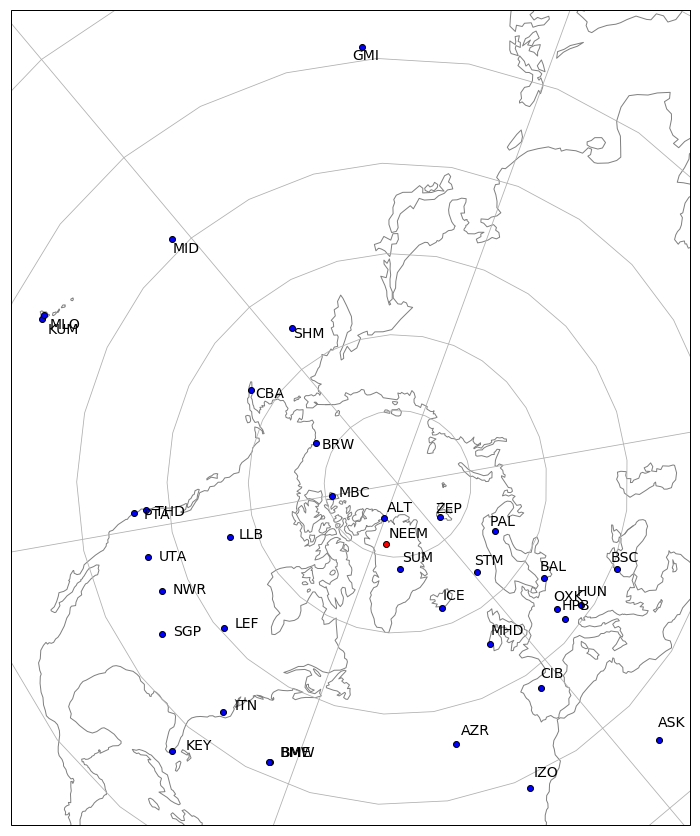

In [107]:
# Plot UKCA grid, NEEM and NOAA stations
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=ccrs.Stereographic(central_latitude=90, central_longitude=-40.0)), 
                       facecolor='w')
ax.coastlines(color='grey');
# ax.set_extent([0, 350, 0, 90], crs=ccrs.PlateCarree());
ax.gridlines(crs=ccrs.PlateCarree());
# UKCA grid
# ax.plot(cyclic_lons, cyclic_lats, color='grey', alpha=0.7, transform=ccrs.PlateCarree());
# ax.plot(cyclic_lons.T, cyclic_lats.T, color='grey', alpha=0.7, transform=ccrs.PlateCarree());
# NEEM
x_helmig2014, y_helmig2014 = -51.10, 77.43
ax.plot(x_helmig2014, y_helmig2014, color='red', linewidth=1, marker='o', markeredgecolor='k', transform=ccrs.PlateCarree());
ax.text(x_helmig2014+1.5, y_helmig2014+1.5, 'NEEM', fontsize=14, transform=ccrs.PlateCarree());
# NOAA
for i, j, k in zip(df.Code, df.Longitude, df.Latitude):
    ax.plot(j, k, color='blue', linewidth=1, marker='o', markeredgecolor='k', transform=ccrs.PlateCarree());
    ax.text(j+1.5, k+1.5, i, fontsize=14, transform=ccrs.PlateCarree());